# import and Install Library 

In [3]:
import numpy as np
import tensorflow as tf
import os
import zipfile
import shutil
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import random
from shutil import copyfile
# import seaborn as sns


# Data Extracting and Loading

In [11]:
#Download data from kaggle using API
# !kaggle competitions download -c cassava-disease

In [12]:
local_zip='./casava.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./casava_disease/')
zip_ref.close()


    

# Exploratory Data Analysist

In [4]:
list_directory=os.listdir('./casava_disease/')
print(list_directory)

['cbb', 'cbsd', 'cgm', 'cmd', 'healthy']


In [5]:
image_directory='./casava_disease/'

for  item in list_directory:
  class_dir = os.path.join(image_directory,item)
  print(item ," : ",len(os.listdir(class_dir)),"images")

cbb  :  466 images
cbsd  :  1443 images
cgm  :  773 images
cmd  :  2658 images
healthy  :  316 images


cbb


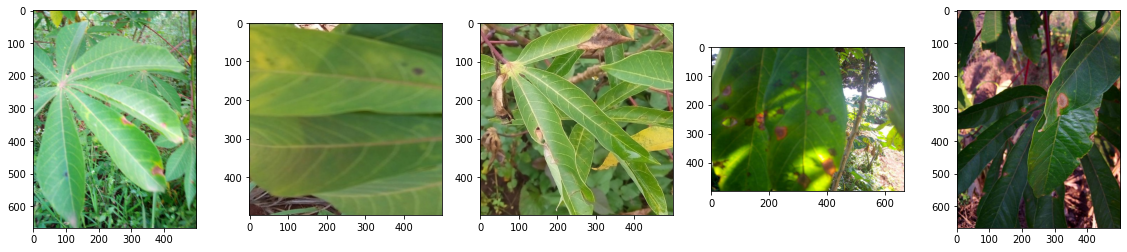

cbsd


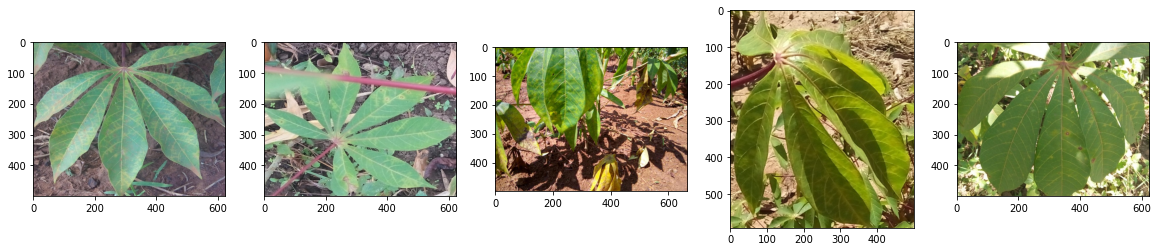

cgm


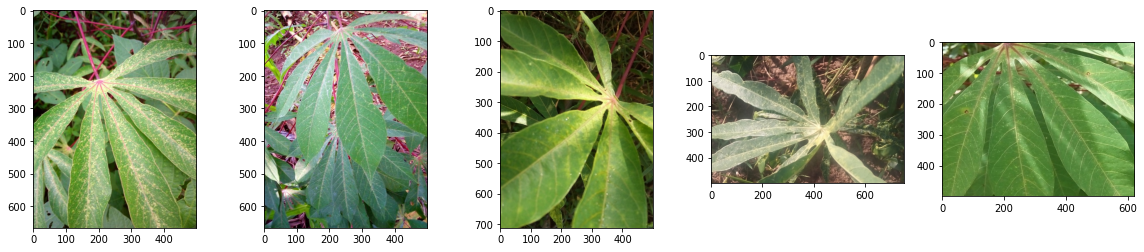

cmd


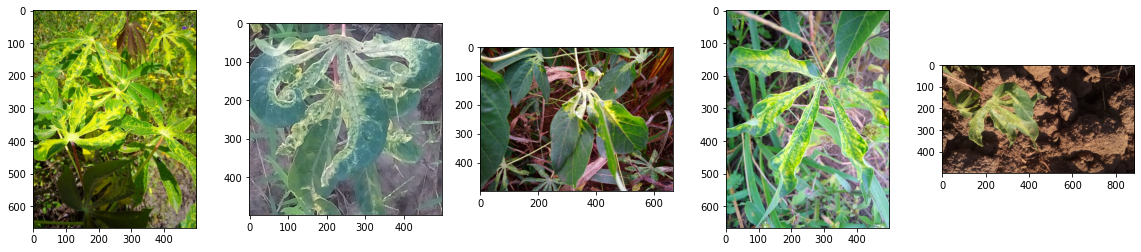

healthy


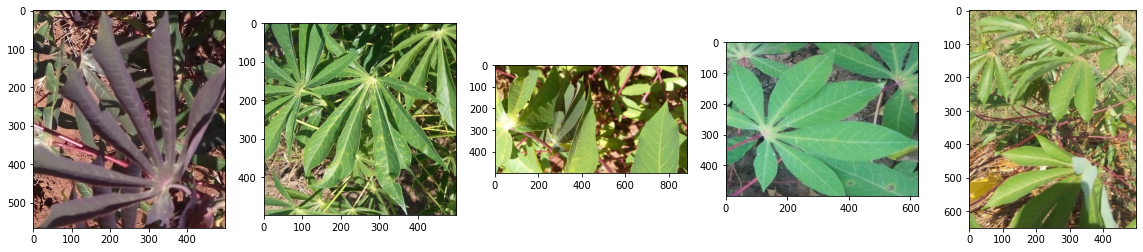

In [6]:
#checking image on directory
for  images in list_directory:
  print(images)
  class_dir = os.path.join(image_directory,images)
  class_images = os.listdir(class_dir)
  plt.figure(figsize=(20, 4))
  for i, img_path in enumerate(class_images[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(class_dir, img_path))
    plt.imshow(img)
  plt.show()

In [7]:
#delete if folder exist
root_dir='./disease_casava_leaf'
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

#create training and testing directory
def create_train_and_test_dir(root_path):
    
    train='training'
    tes='testing'
  #CREATE SUB OF ROOT DIRECTORY
    path_train=os.path.join(root_dir,train)
    path_test=os.path.join(root_dir,tes)
    train_dir=os.makedirs(path_train)
    test_dir=os.makedirs(path_test)
    base_train='./disease_casava_leaf/training/'
    base_test='./disease_casava_leaf/testing/' 
    list_disease=['cbb','cbsd','cgm','cmd','healthy']
    for i in(list_disease):
        path_training=os.path.join(base_train,i)
        path_test=os.path.join(base_test,i)
        make_dir_train=os.makedirs(path_training)
        make_dr_test=os.makedirs(path_test)
        
try:
  create_train_and_test_dir(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")
    

In [8]:
#checking folder in test and train directory
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

./disease_casava_leaf\testing
./disease_casava_leaf\training
./disease_casava_leaf\testing\cbb
./disease_casava_leaf\testing\cbsd
./disease_casava_leaf\testing\cgm
./disease_casava_leaf\testing\cmd
./disease_casava_leaf\testing\healthy
./disease_casava_leaf\training\cbb
./disease_casava_leaf\training\cbsd
./disease_casava_leaf\training\cgm
./disease_casava_leaf\training\cmd
./disease_casava_leaf\training\healthy


In [11]:
#splitting and copyng data for testing and training
def data_split(source_data,training_data,testing_data,split_size):
    files=[]
    for filename in os.listdir(source_data):
        file= source_data + filename
        if os.path.getsize(file)>0:
          files.append(filename)
        else:
          print(filename + ' is zero length, so ignoring.')

    training_length=int(len(files)*split_size)
     
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[:testing_length]
    for filename in training_set:
        this_file = source_data + filename
        destination = training_data + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = source_data + filename
        destination = testing_data + filename
        copyfile(this_file, destination)

    

In [12]:
# folder source image 
cbb_image_source='./casava_disease/cbb/'
cbsd_image_source='./casava_disease/cbsd/'
cgm_image_source='./casava_disease/cgm/'
cmd_image_source='./casava_disease/cmd/'
healthy_image_source='./casava_disease/healthy/'

#train_directory 
train_directory='./disease_casava_leaf/training/'
testing_directgory='./disease_casava_leaf/testing/'

#directory to copyng files for train directory
cbb_train_dir='./disease_casava_leaf/training/cbb/'
cbsd_train_dir='./disease_casava_leaf/training/cbsd/'
cgm_train_dir='./disease_casava_leaf/training/cgm/'
cmd_train_dir='./disease_casava_leaf/training/cmd/'
healthy_train_dir='./disease_casava_leaf/training/healthy/'

#directory to copyng files in tro used for testing
cbb_test_dir='./disease_casava_leaf/testing/cbb/'
cbsd_test_dir='./disease_casava_leaf/testing/cbsd/'
cgm_test_dir='./disease_casava_leaf/testing/cgm/'
cmd_test_dir='./disease_casava_leaf/testing/cmd/'
healthy_test_dir='./disease_casava_leaf/testing/healthy/'

#remove files if directory is not empty
if len(os.listdir(cbb_train_dir)) > 0:
  for file in os.scandir(cbb_train_dir):
    os.remove(file.path)
if len(os.listdir(cbsd_train_dir)) > 0:
  for file in os.scandir(cbsd_train_dir):
    os.remove(file.path)
if len(os.listdir(cgm_train_dir)) > 0:
  for file in os.scandir(cgm_train_dir):
    os.remove(file.path)
if len(os.listdir(cmd_train_dir)) > 0:
  for file in os.scandir(cmd_train_dir):
    os.remove(file.path)
if len(os.listdir(healthy_train_dir)) > 0:
  for file in os.scandir(healthy_train_dir):
    os.remove(file.path)
if len(os.listdir(cbb_test_dir)) > 0:
  for file in os.scandir(cbb_test_dir):
    os.remove(file.path)
if len(os.listdir(cbsd_test_dir)) > 0:
  for file in os.scandir(cbsd_test_dir):
    os.remove(file.path)
if len(os.listdir(cgm_test_dir)) > 0:
  for file in os.scandir(cgm_test_dir):
    os.remove(file.path)
if len(os.listdir(cmd_test_dir)) > 0:
  for file in os.scandir(cmd_test_dir):
    os.remove(file.path)
if len(os.listdir(healthy_test_dir)) > 0:
  for file in os.scandir(healthy_test_dir):
    os.remove(file.path)

data_split_size=.8

data_split(cbb_image_source,cbb_train_dir,cbb_test_dir,data_split_size)
data_split(cbsd_image_source,cbsd_train_dir,cbsd_test_dir,data_split_size)
data_split(cgm_image_source,cgm_train_dir,cgm_test_dir,data_split_size)
data_split(cmd_image_source,cmd_train_dir,cmd_test_dir,data_split_size)
data_split(healthy_image_source,healthy_train_dir,healthy_test_dir,data_split_size)











In [13]:
#looking for image properties on training directory
training_directory='./disease_casava_leaf/training/'
listdir_train_image=os.listdir(training_directory)
total_train_images=0
for item in listdir_train_image:
    class_dir = os.path.join(training_directory,item)
    sum_total=len(os.listdir(class_dir))
    total_train_images=total_train_images+sum_total
    print("Train",item ," : ",len(os.listdir(class_dir)),"images")
print('total train image: ',total_train_images,"Images")

    
    

Train cbb  :  372 images
Train cbsd  :  1154 images
Train cgm  :  618 images
Train cmd  :  2126 images
Train healthy  :  252 images
total train image:  4522 Images


In [14]:
#looking for image properties on testing directory
testing_directory='./disease_casava_leaf/testing/'
listdir_test_images=os.listdir(testing_directory)
total_test_images=0
for item in listdir_test_images:
    class_dir=os.path.join(testing_directory,item)
    sum_total=len(os.listdir(class_dir))
    total_test_images=total_test_images+sum_total
    print("Test",item," : ",len(os.listdir(class_dir)),"images")
print('total test image: ',total_test_images,"Images")

    

Test cbb  :  94 images
Test cbsd  :  289 images
Test cgm  :  155 images
Test cmd  :  532 images
Test healthy  :  64 images
total test image:  1134 Images


# Import library for modelling from tensorflow

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Activation, Flatten, MaxPool2D

# Image Preprocessing

In [16]:
image_training_dir='./disease_casava_leaf/training/'
train_datagen=ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(image_training_dir,
                                                    batch_size=100,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))

image_validation_dir='./disease_casava_leaf/testing/'

validation_datagen=ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_generator=validation_datagen.flow_from_directory(
    image_validation_dir,
    batch_size=100,
    class_mode='categorical',
    target_size=(150, 150)
)


NameError: name 'image_train_dir' is not defined